In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
df = pd.read_csv("train.csv")

In [113]:
df
# df1.iloc[0:5]

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,...,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,...,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,...,49.839714,-78.342701,34.296977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,010Q650 X 2020-01-05,2020-01-05,010Q650,49.0,10.0,55.0,1113.67,96,6.911948,21.300001,...,29.181258,-73.896588,30.545446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,010Q650 X 2020-01-06,2020-01-06,010Q650,21.0,9.0,52.0,1164.82,95,13.900001,44.700001,...,0.797294,-68.612480,26.899694,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30552,YWSFY6Q X 2020-03-15,2020-03-15,YWSFY6Q,22.0,14.0,83.0,3848.86,72,6.700000,68.300003,...,54.302954,12.312248,49.871571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30553,YWSFY6Q X 2020-03-16,2020-03-16,YWSFY6Q,53.0,30.0,146.0,9823.87,72,6.300000,77.700005,...,36.170757,-129.236726,49.779531,1863.555567,3475.020107,0.052920,-96.149506,33.230234,-157.067467,49.912310
30554,YWSFY6Q X 2020-03-17,2020-03-17,YWSFY6Q,85.0,52.0,153.0,8900.85,72,7.100000,68.500000,...,8.955216,-162.856069,48.459205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30555,YWSFY6Q X 2020-03-18,2020-03-18,YWSFY6Q,103.0,33.0,149.0,13963.90,72,19.100000,66.300003,...,17.974815,-168.906764,47.293537,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
df.isnull().sum()

Place_ID X Date                     0
Date                                0
Place_ID                            0
target                              0
target_min                          0
                                ...  
L3_CH4_aerosol_optical_depth    24765
L3_CH4_sensor_azimuth_angle     24765
L3_CH4_sensor_zenith_angle      24765
L3_CH4_solar_azimuth_angle      24765
L3_CH4_solar_zenith_angle       24765
Length: 82, dtype: int64

In [21]:
df.duplicated().sum()

0

In [43]:
df.describe()

,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
count,10.00000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,28.30000,12.800000,47.500000,873.572000,93.30000,13.380809,43.220001,0.006311,20.292432,2.968429,...,37.637525,-68.750465,28.468387,1194.584676,2204.027344,0.008561,50.037031,31.052995,-38.670258,13.946257
std,10.22035,6.779053,11.937336,422.865108,3.40098,3.390252,12.484461,0.001434,3.477539,0.853494,...,20.816018,5.885645,3.851464,1034.542452,1910.344309,0.007752,43.337148,28.383558,33.744014,12.186737
min,18.00000,6.000000,28.000000,279.190000,85.00000,6.911948,21.300001,0.003910,16.616602,1.996377,...,0.797294,-78.342701,22.363665,0.000000,0.000000,0.000000,0.000000,0.000000,-62.142639,0.000000
25%,21.00000,8.250000,37.500000,423.322500,92.25000,11.200000,34.800001,0.005463,17.392915,2.514652,...,29.537237,-73.336666,26.522641,894.980225,1613.927734,0.005290,37.240524,18.750750,-58.005386,9.646826
50%,24.00000,10.000000,52.000000,1083.445000,94.50000,14.250000,43.450001,0.005792,19.198541,2.838848,...,37.884860,-68.599393,28.352582,1789.960449,3227.855469,0.010579,74.481049,37.501499,-53.868134,19.293652
75%,35.50000,15.750000,54.500000,1177.675000,95.75000,15.350000,48.375000,0.007470,22.412347,3.216764,...,57.178612,-63.524075,31.416719,1791.877014,3306.041016,0.012842,75.055546,46.579493,-26.934067,20.919385
max,49.00000,25.000000,63.000000,1319.850000,96.00000,18.600000,62.400002,0.008390,27.031030,5.065727,...,60.866484,-60.765053,34.296977,1793.793579,3384.226562,0.015104,75.630043,55.657486,0.000000,22.545118


In [80]:
df.columns

Index(['Place_ID X Date', 'Date', 'Place_ID', 'target', 'target_min',
       'target_max', 'target_variance', 'target_count',
       'precipitable_water_entire_atmosphere',
       'relative_humidity_2m_above_ground',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_ground',
       'L3_NO2_NO2_column_number_density',
       'L3_NO2_NO2_slant_column_number_density',
       'L3_NO2_absorbing_aerosol_index', 'L3_NO2_cloud_fraction',
       'L3_NO2_sensor_altitude', 'L3_NO2_sensor_azimuth_angle',
       'L3_NO2_sensor_zenith_angle', 'L3_NO2_solar_azimuth_angle',
       'L3_NO2_solar_zenith_angle',
       'L3_NO2_stratospheric_NO2_column_number_density',
       'L3_NO2_tropopause_pressure',
       'L3_NO2_tropospheric_NO2_column_number_density',
       'L3_O3_O3_column_number_density', 'L3_O3_O3_effective_temperature',
       'L3_O3_cloud_fraction', 'L3_O3_sensor_azimuth_angle',
   

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30557 entries, 0 to 30556
Data columns (total 82 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Place_ID X Date                                      30557 non-null  object 
 1   Date                                                 30557 non-null  object 
 2   Place_ID                                             30557 non-null  object 
 3   target                                               30557 non-null  float64
 4   target_min                                           30557 non-null  float64
 5   target_max                                           30557 non-null  float64
 6   target_variance                                      30557 non-null  float64
 7   target_count                                         30557 non-null  int64  
 8   precipitable_water_entire_atmosphere                 30557 non-nul

In [52]:
df.isnull().sum()

Place_ID X Date                     0
Date                                0
Place_ID                            0
target                              0
target_min                          0
                                ...  
L3_CH4_aerosol_optical_depth    24765
L3_CH4_sensor_azimuth_angle     24765
L3_CH4_sensor_zenith_angle      24765
L3_CH4_solar_azimuth_angle      24765
L3_CH4_solar_zenith_angle       24765
Length: 82, dtype: int64

In [115]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
30552    False
30553    False
30554    False
30555    False
30556    False
Length: 30557, dtype: bool

In [118]:
df.drop(df.columns[df.isnull().mean()>0.70], axis= 1, inplace= True)
df

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,...,22.358167,-0.000127,0.312521,-0.000040,-1.861476,0.000000,76.536426,38.593017,-61.752587,22.363665
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,...,28.614804,0.000150,0.433957,0.000050,-1.452612,0.059433,-14.708036,59.624912,-67.693509,28.614804
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,...,34.296977,0.000150,0.356925,0.000053,-1.572950,0.082063,-105.201338,49.839714,-78.342701,34.296977
3,010Q650 X 2020-01-05,2020-01-05,010Q650,49.0,10.0,55.0,1113.67,96,6.911948,21.300001,...,30.545393,0.000227,0.584522,0.000110,-1.239317,0.121261,-104.334066,29.181258,-73.896588,30.545446
4,010Q650 X 2020-01-06,2020-01-06,010Q650,21.0,9.0,52.0,1164.82,95,13.900001,44.700001,...,26.899694,0.000390,0.408047,0.000159,0.202489,0.037919,58.850179,0.797294,-68.612480,26.899694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30552,YWSFY6Q X 2020-03-15,2020-03-15,YWSFY6Q,22.0,14.0,83.0,3848.86,72,6.700000,68.300003,...,49.871571,0.000312,0.203573,0.000063,-1.953480,0.001310,-16.856890,54.302954,12.312248,49.871571
30553,YWSFY6Q X 2020-03-16,2020-03-16,YWSFY6Q,53.0,30.0,146.0,9823.87,72,6.300000,77.700005,...,49.012079,0.000362,0.234613,0.000090,-2.178236,0.007644,-85.223618,36.170757,-129.236726,49.779531
30554,YWSFY6Q X 2020-03-17,2020-03-17,YWSFY6Q,85.0,52.0,153.0,8900.85,72,7.100000,68.500000,...,48.459205,0.000107,0.263715,0.000031,-2.365827,0.025447,-103.669725,8.955216,-162.856069,48.459205
30555,YWSFY6Q X 2020-03-18,2020-03-18,YWSFY6Q,103.0,33.0,149.0,13963.90,72,19.100000,66.300003,...,47.292238,0.000014,0.546447,-0.000008,-2.784346,0.153445,71.095910,17.974815,-168.906764,47.293537


In [120]:
df[['Year', 'Month', 'Day']]= df['Date'].str.split('-',2, expand=True)
df

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,Year,Month,Day
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,...,-0.000040,-1.861476,0.000000,76.536426,38.593017,-61.752587,22.363665,2020,01,02
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,...,0.000050,-1.452612,0.059433,-14.708036,59.624912,-67.693509,28.614804,2020,01,03
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,...,0.000053,-1.572950,0.082063,-105.201338,49.839714,-78.342701,34.296977,2020,01,04
3,010Q650 X 2020-01-05,2020-01-05,010Q650,49.0,10.0,55.0,1113.67,96,6.911948,21.300001,...,0.000110,-1.239317,0.121261,-104.334066,29.181258,-73.896588,30.545446,2020,01,05
4,010Q650 X 2020-01-06,2020-01-06,010Q650,21.0,9.0,52.0,1164.82,95,13.900001,44.700001,...,0.000159,0.202489,0.037919,58.850179,0.797294,-68.612480,26.899694,2020,01,06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30552,YWSFY6Q X 2020-03-15,2020-03-15,YWSFY6Q,22.0,14.0,83.0,3848.86,72,6.700000,68.300003,...,0.000063,-1.953480,0.001310,-16.856890,54.302954,12.312248,49.871571,2020,03,15
30553,YWSFY6Q X 2020-03-16,2020-03-16,YWSFY6Q,53.0,30.0,146.0,9823.87,72,6.300000,77.700005,...,0.000090,-2.178236,0.007644,-85.223618,36.170757,-129.236726,49.779531,2020,03,16
30554,YWSFY6Q X 2020-03-17,2020-03-17,YWSFY6Q,85.0,52.0,153.0,8900.85,72,7.100000,68.500000,...,0.000031,-2.365827,0.025447,-103.669725,8.955216,-162.856069,48.459205,2020,03,17
30555,YWSFY6Q X 2020-03-18,2020-03-18,YWSFY6Q,103.0,33.0,149.0,13963.90,72,19.100000,66.300003,...,-0.000008,-2.784346,0.153445,71.095910,17.974815,-168.906764,47.293537,2020,03,18


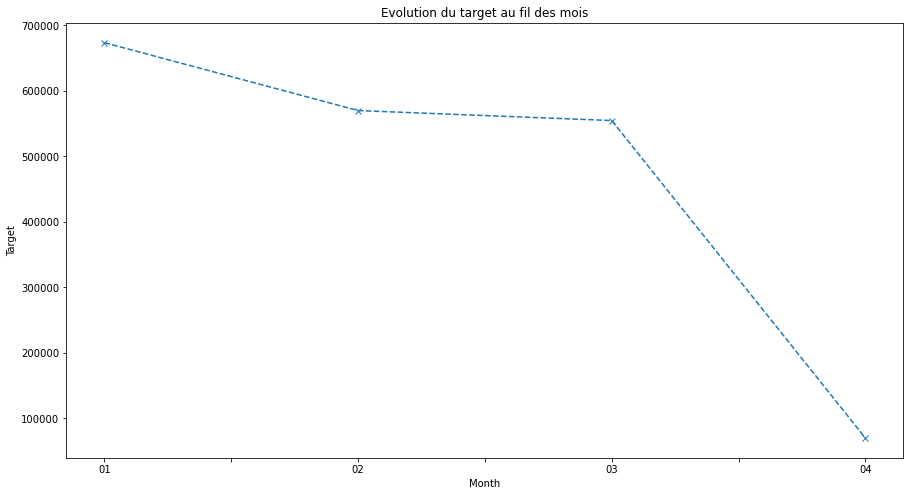

In [121]:
#Evolution du target au fil des mois
df.groupby(['Month'])['target'].sum().plot(figsize= (15,8), marker= 'x', linestyle='--')
plt.ylabel('Target')
plt.title('Evolution du target au fil des mois')
plt.show()

In [132]:
dfseg = df.head(10)
dfseg

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,Year,Month,Day
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,...,-0.000040,-1.861476,0.000000,76.536426,38.593017,-61.752587,22.363665,2020,01,02
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,...,0.000050,-1.452612,0.059433,-14.708036,59.624912,-67.693509,28.614804,2020,01,03
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,...,0.000053,-1.572950,0.082063,-105.201338,49.839714,-78.342701,34.296977,2020,01,04
3,010Q650 X 2020-01-05,2020-01-05,010Q650,49.0,10.0,55.0,1113.67,96,6.911948,21.300001,...,0.000110,-1.239317,0.121261,-104.334066,29.181258,-73.896588,30.545446,2020,01,05
4,010Q650 X 2020-01-06,2020-01-06,010Q650,21.0,9.0,52.0,1164.82,95,13.900001,44.700001,...,0.000159,0.202489,0.037919,58.850179,0.797294,-68.612480,26.899694,2020,01,06
5,010Q650 X 2020-01-07,2020-01-07,010Q650,28.0,10.0,52.0,1053.22,94,14.600000,42.200001,...,0.000008,-0.987820,0.063836,76.387658,30.605176,-62.134264,23.419991,2020,01,07
6,010Q650 X 2020-01-08,2020-01-08,010Q650,21.0,6.0,51.0,1239.66,96,15.600000,47.100002,...,-0.000198,-0.144565,0.400741,-41.126184,60.866484,-71.908414,32.348835,2020,01,08
7,010Q650 X 2020-01-09,2020-01-09,010Q650,18.0,6.0,28.0,307.93,93,18.600000,62.400002,...,-0.000085,1.419429,0.041323,-13.662432,59.674296,-60.765053,26.396956,2020,01,09
8,010Q650 X 2020-01-10,2020-01-10,010Q650,21.0,15.0,33.0,305.92,95,11.800000,39.000000,...,0.000092,-0.049010,0.081806,-104.544468,37.176703,-73.812750,31.707143,2020,01,10
9,010Q650 X 2020-01-11,2020-01-11,010Q650,24.0,16.0,32.0,279.19,85,10.396144,33.100002,...,0.000182,-0.929266,0.058308,-104.110578,10.016394,-68.586306,28.090359,2020,01,11


In [133]:
corr = dfseg.corr().round(3)
corr

,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,...,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle
target,1.000,0.498,0.593,0.388,0.004,-0.663,-0.304,-0.042,0.444,-0.067,...,-0.089,0.046,0.339,0.177,-0.679,-0.165,0.011,0.007,-0.022,-0.157
target_min,0.498,1.000,0.249,-0.045,-0.527,-0.362,0.195,0.471,0.158,-0.260,...,-0.255,0.241,-0.328,0.243,-0.577,-0.434,0.164,0.004,0.229,-0.343
target_max,0.593,0.249,1.000,0.939,0.357,-0.093,-0.155,0.192,0.371,0.208,...,0.011,-0.149,0.485,-0.049,-0.666,0.124,0.287,0.123,-0.207,0.041
target_variance,0.388,-0.045,0.939,1.000,0.490,0.083,-0.175,0.060,0.257,0.244,...,0.094,-0.231,0.647,-0.153,-0.426,0.341,0.248,0.154,-0.273,0.178
target_count,0.004,-0.527,0.357,0.490,1.000,0.185,-0.098,-0.203,-0.049,0.273,...,0.297,-0.378,0.493,-0.340,0.150,0.363,0.043,0.275,-0.374,0.360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L3_SO2_cloud_fraction,-0.165,-0.434,0.124,0.341,0.363,0.127,-0.137,-0.307,-0.149,-0.175,...,0.267,-0.444,0.776,-0.587,0.145,1.000,-0.265,0.381,-0.380,0.532
L3_SO2_sensor_azimuth_angle,0.011,0.164,0.287,0.248,0.043,0.253,0.650,0.322,-0.595,-0.376,...,-0.863,-0.378,-0.111,-0.261,0.023,-0.265,1.000,-0.117,0.763,-0.827
L3_SO2_sensor_zenith_angle,0.007,0.004,0.123,0.154,0.275,0.532,0.407,0.571,0.047,0.303,...,0.169,-0.735,0.167,-0.766,0.057,0.381,-0.117,1.000,0.005,0.274
L3_SO2_solar_azimuth_angle,-0.022,0.229,-0.207,-0.273,-0.374,0.219,0.735,0.352,-0.623,-0.460,...,-0.924,-0.374,-0.339,-0.279,0.230,-0.380,0.763,0.005,1.000,-0.922


In [130]:
#cor_targetTemp = df['target'].corr(df['temperature_2m_above_ground'])
corr_target = df.corr()['target']
corr_target

target                         1.000000
target_min                     0.818803
target_max                     0.630801
target_variance                0.184818
target_count                   0.094135
                                 ...   
L3_SO2_cloud_fraction         -0.025099
L3_SO2_sensor_azimuth_angle    0.016728
L3_SO2_sensor_zenith_angle     0.007332
L3_SO2_solar_azimuth_angle    -0.180241
L3_SO2_solar_zenith_angle     -0.037803
Name: target, Length: 72, dtype: float64

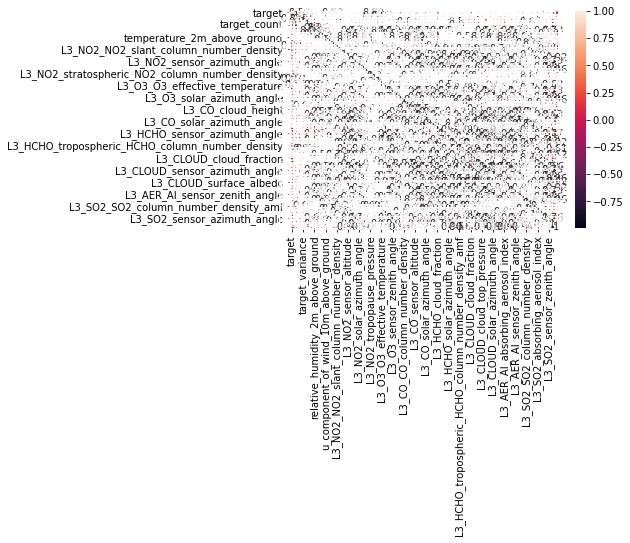

In [135]:
sns.heatmap(corr, annot= True)

In [136]:
df['L3_NO2_stratospheric_NO2_column_number_density']

0        0.000057
1        0.000055
2        0.000059
3        0.000060
4        0.000062
           ...   
30552    0.000044
30553    0.000038
30554    0.000043
30555    0.000037
30556         NaN
Name: L3_NO2_stratospheric_NO2_column_number_density, Length: 30557, dtype: float64

In [93]:
df['L3_NO2_stratospheric_NO2_column_number_density'].str.strip('-')
df['L3_NO2_stratospheric_NO2_column_number_density']

0        5.67927e-05
1        5.46511e-05
2        5.91257e-05
3        5.95394e-05
4        6.16401e-05
            ...     
30552    4.36727e-05
30553    3.81044e-05
30554    4.29089e-05
30555    3.67876e-05
30556               
Name: L3_NO2_stratospheric_NO2_column_number_density, Length: 30557, dtype: object

In [94]:
cor_targetNO2 = df['target'].corr(['L3_NO2_tropopause_pressure'])
cor_targetNO2

TypeError: unsupported type: <class 'list'>

In [83]:
#Variation du NO2 dans le temps
#Evolution du target au fil des mois
df.groupby(['Month'])['L3_NO2_stratospheric_NO2_column_number_density'].sum()

TypeError: unsupported operand type(s) for +: 'float' and 'str'